In [ ]:
#Pregunta 1 del Segundo Parcial de Inteligencia Artificial (sis420)
#Estudiante: Ortube Rengel Erika Mariana
#Carrera: Ing. Sistemas

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

#loggin: contiene todos los registros importantes del historial de eventos
#modulo de registro de errores de código simples y genera un mensaje
from logging import error

#libreria para graficos
from matplotlib import pyplot

#modulo de optimizacion en scipy
from scipy import optimize

#le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [10]:
#los datos se cargan en formato txt
fashion_train = '/content/drive/MyDrive/fashion-mnist_train.csv'
data = np.loadtxt(fashion_train, skiprows=1, delimiter=',')
fashion_train = '/content/drive/MyDrive/fashion-mnist_test.csv'
test = np.loadtxt(fashion_train, skiprows=1, delimiter=',')

In [13]:
#se ingresan imágenes de ropa/accesroios del datasey, de 28x28
input_layer_size  = 784

#10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10

#los elementos de secuencia
X, y = data[:,1:], data[:,0].ravel()

#agrega nuevos elementos al final de los arrays
X = np.append(X, test[:,1:], axis=0)
y = np.append(y, test[:,0], axis=0)

print("El 80% del total es:", 70000*0.80)

X= X[0:56000]
y= y[0:56000]
m = y.size
print("Número de ejemplos: ",m)

El 80% es: 56000.0
56000


In [14]:
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2. 9. 6. ... 8. 4. 1.]


In [16]:
#definicion de funcion que muestra datos 2D almacenados en 'X', en una cuadrícula apropiada de 10x10
def displayData(X, example_width=None, figsize=(10, 10)):
    #calcula las filas y las columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        #proporciona a una matriz bidimensional
        X = X[None]  
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimenosinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    #np.round() = función matemática que redondea una matriz al número dado de decimales
    #np.sqrt() = calcula la raíz cuadrada del numero de ejemplos
    #np.floor() = devuelve el piso de la entrada, por elementos
    #no.ceil() = devuelve el techo de la entrada, por elementos
    #calcula el numero de elementos que se van a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

In [17]:
#muestra la dimension que tiene 'X'
X.ndim

2

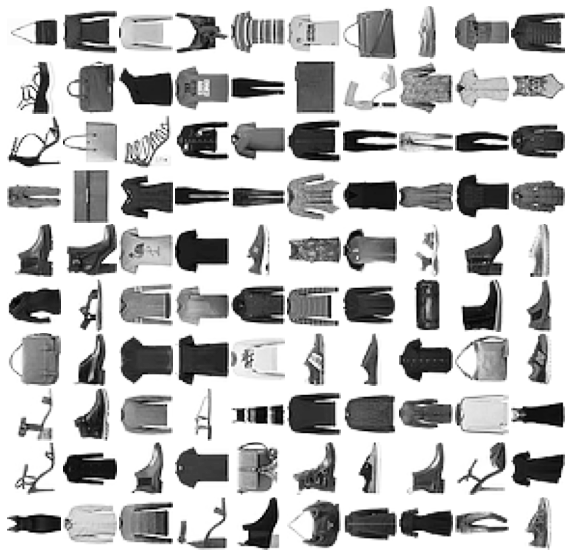

In [18]:
#selecciona aleatoriamente 100 puntos de datos, de todos los que hay, para mostrar
#genera un array de 100 puntos diferentes (sin que se repitan)
rand_indices = np.random.choice(m, 100, replace=False)

#obtiene el valor de 'X' en cada posicion que ha sido generada en 'rand_indices'
sel = X[rand_indices, :]

#muestra una imagen en 2D de los puntos aleatoriamente seleccionados
displayData(sel)

In [19]:
#valores de prueba para los parámetros 'theta'
theta_t = np.array([-2, -1, 1, 2], dtype=float)

#valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

#valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

#valores de testeo para el parametro de regularizacion
lambda_t = 3

In [20]:
#definicion de funcion que calcula la sigmoide de 'z'
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [21]:
#defincion de funcion que calcula el costo de usar theta como parámetro
def lrCostFunction(theta, X, y, lambda_):
    """
      Parametros
          theta: array_like
              Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ).
              n es el numero de caracteristicas incluida la intercepcion

          X: array_like
              Dataset con la forma(shape) (m x n); m es el numero de ejemplos
              n es el numero de caracteristicas incluida la intercepcion
          
          y: array_like
              Conjunto de etiquetas. Un vector con la forma (shape) (m, ).
              m es el numero de ejemplos
          
          lambda_: float
              Parametro de regularización. 
        
      Devuelve
          J: float
              El valor calculado para la funcion de costo regularizada. 
          
          grad: array_like
              Un vector de la forma (shape) (n, ) que es el gradiente de la 
              función de costo con respecto a theta, en los valores actuales de theta.
    """
    #inicializamos algunos valores utiles
    m = y.size
    
    #convierte las etiquetas a valores enteros si son booleanos
    if y.dtype == bool:
        y = y.astype(int)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X.dot(theta.T))
    
    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X) 

    grad = grad + (lambda_ / m) * temp

    return J, grad

In [22]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo: {:.6f}'.format(J))
print('Costo esperado: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo: 2.534819
Costo esperado: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [23]:
#defincion de funcion para la regresion logistica multiclase "One vs All"
#que entrena num_labels clasificadores de regresión logística y devoluciones
#cada uno de estos clasificadores en una matriz all_theta, donde la i-ésima fila de all_theta corresponde al clasificador para la etiqueta i. 
def oneVsAll(X, y, num_labels, lambda_):
    """
    Parametros
        X: array_like
            El conjunto de datos de entrada de forma (m x n); m es el número de ejemplos
            n es el número de características.
        
        y: array_like
            Las etiquetas de datos. Un vector de forma (m, ).
        
        num_labels: int
            Número de etiquetas posibles.
        
        lambda_: float
            El parámetro de regularización logística.
    
    Devuelve
        all_theta: array_like
            Los parámetros entrenados para la regresión logística para cada clase.
            Esta es una matriz de forma (K x n+1) donde K es el número de clases
            (es decir, num_labels) y n es el número de características sin el sesgo.
    """
    #algunas variables utiles
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n + 1))

    #agrega 1's a la matriz 'X'
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options)
        all_theta[c] = res.x

    return all_theta

In [24]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


(10, 785)


In [25]:
#definicion de funcion que devuelve un vector de predicciones para cada ejemplo en la matriz X
#tener en cuenta que 'X' contiene los ejemplos en filas
#all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase
#se debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]; predice clases 0, 2, 0, 1 para 4 ejemplos).
def predictOneVsAll(all_theta, X):
    """
      Parametros
          all_theta: array_like
              Los parámetros entrenados para la regresión logística para cada clase.
              Esta es una matriz de forma (K x n+1) donde K es el número de clases
              y n es el número de características sin el sesgo.

          X: array_like
              Puntos de datos para predecir sus etiquetas. Esta es una matriz de forma (m x n);
              m es el número de puntos de datos para predecir, y n es el número de características sin el término de sesgo.
              Tener en cuenta que se agrega el término de sesgo para 'X' en esta función.
              
      Devuelve
          p: array_like
              Las predicciones para cada punto de datos en 'X'. Este es un vector de forma (m, ).
    """ 
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    #agrega 1's a la matriz de datos 'X'
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(56000, 784)
Precision del conjuto de entrenamiento: 85.60%
(1, 784)
(1, 785)
[0]


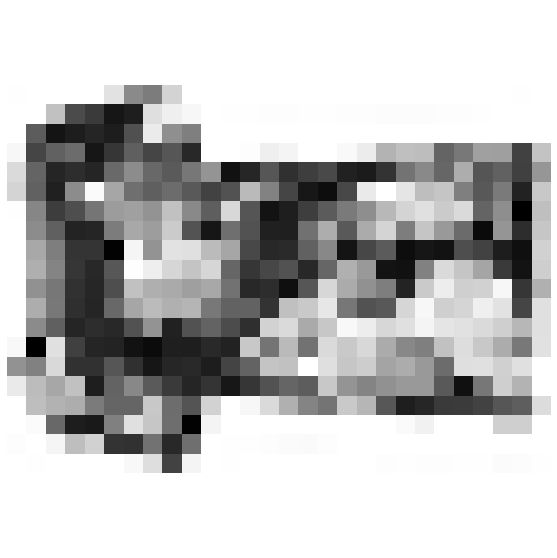

In [26]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[1002:1003, :].copy()
print(XPrueba.shape)

XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

displayData(X[1002:1003, :])